## Step 1 Construct features using NLTK

In [57]:
import nltk
from nltk.corpus import stopwords
import string
import json

%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from __future__ import division

randomState = np.random.seed(2)


# Import works.json: title, words, sentences of 38 pieces
with open('works_v1028.json', 'r') as f:
    try:
        works = json.load(f)
    # if the file is empty the ValueError will be thrown
    except ValueError:
        works = {}


In [58]:
from nltk import FreqDist

def getFreqDist(words):
    nltk_text = nltk.Text(words)
    
    return FreqDist(nltk_text)


In [59]:
def getCountFrequency(words, freq):
    nltk_text = nltk.Text(words)
    freq_dist = FreqDist(nltk_text)
    
    count = 0
    for key,value in freq_dist.items():
        if value == freq:
            count += 1
    
    return count    

def getHapaxLegomena(words):
    return getCountFrequency(words, 1)



In [60]:
def getDisLegomena(words):
    return getCountFrequency(words, 2)


In [61]:
def getNumberUniqueWords(words):
    return len(getFreqDist(words))


In [62]:
def getWordLengthDistribution(words):
    result = FreqDist()
    for w in words:        
        result[len(w)] += 1
    
    return result

def printFreqDist(freq_dist):
    for key,value in freq_dist.items():
        print (key,value)    


In [63]:
def getSentenceLengthDistribution(sents):
    result = FreqDist()
    for s in sents:        
        result[len(s)] += 1
    
    return result   



In [64]:
def getAverageSentenceLength(words_all, sents):
    
    return len(words_all)/len(sents)


In [65]:
def getPronounDistribution(sents):
    result = FreqDist()
    pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'you', 'they', 'thou', 'ye']
    for s in sents:
        count = 0
        for p in pronouns:
            count += s.count(p)
        result[count] += 1
    
    return result

In [66]:
def getNumberOfPronoun(words):
    pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'you', 'they', 'thou', 'ye']
    count = 0
         
    for p in pronouns:
        count += words.count(p)
    
    return count

In [67]:
def getConjunctionDistribution(sents):
    result = FreqDist()
    conjunctions = ['for', 'and', 'nor', 'but', 'or', 'yet', 'so', 'after', 'although', 'as', 'because', 'before', 'if',
                'once', 'since', 'though', 'unless', 'until', 'when', 'where', 'while', 'whether', 'either', 'neither',
                'as', 'than', 'even', 'then', 'lest', 'rather', 'which', 'who', 'why', 'that', 'till']
    for s in sents:
        count = 0
        for c in conjunctions:
            count += s.count(c)
        result[count] += 1
    
    return result


In [68]:
def getNumberOfConjunction(words):
    count = 0
    conjunctions = ['for', 'and', 'nor', 'but', 'or', 'yet', 'so', 'after', 'although', 'as', 'because', 'before', 'if',
                'once', 'since', 'though', 'unless', 'until', 'when', 'where', 'while', 'whether', 'either', 'neither',
                'as', 'than', 'even', 'then', 'lest', 'rather', 'which', 'who', 'why', 'that', 'till']

    for c in conjunctions:
        count += words.count(c)
    
    return count

In [69]:
def getNumberOfComma(text):
    return text.count(",")

def getNumberOfDots(text):
    return text.count(".")

def getNumberOfStringList(words, string_list):
    count = 0
    
    for c in string_list:
        count += words.count(c)
    
    return count

def getNumberOfThe(words):
    string_list = ['a', 'an', 'the']
    
    return getNumberOfStringList(words, string_list)

def getNumberOfIn(words):
    string_list = ['in', 'on', 'to', 'of']
    
    return getNumberOfStringList(words, string_list)

def getNumberOfIs(words):
    string_list = ['is', 'are', 'was', 'were']
    
    return getNumberOfStringList(words, string_list)


In [70]:
# Create a feature table for all acts
# Currently only has some simple features

featureTable = {}

featureTable = {'act': [], 'filename': [], 'HapaxLegomena': [], 'DisLegomena': [], 
                'numberUniqueWords': [], 'averageSentenceLength': [], 'numberOfSentences': [],
                'numberOfPronoun': [], 'numberOfConjunction': [], 'numberOfComma': [], 'numberOfDots': [],
                'numberOfThe': [], 'numberOfIn': [], 'numberOfIs': []}


for act, content in works.items():
    words_nonStemmed = content['words_nonStemmed']
    words_all = content['words_all']
    sentences = content['sentences']
    # Normalize by number of all words
    normalizer = len(words_all)
    featureTable['act'].append(act)
    featureTable['filename'].append(content['filename'])
    featureTable['HapaxLegomena'].append(getHapaxLegomena(words_nonStemmed)/normalizer)
    featureTable['DisLegomena'].append(getDisLegomena(words_nonStemmed)/normalizer)
    featureTable['numberUniqueWords'].append(getNumberUniqueWords(words_nonStemmed)/normalizer)
    featureTable['averageSentenceLength'].append(getAverageSentenceLength(words_all, sentences))
    featureTable['numberOfSentences'].append(len(sentences))
    featureTable['numberOfPronoun'].append(getNumberOfPronoun(words_all)/normalizer)
    featureTable['numberOfConjunction'].append(getNumberOfConjunction(words_all)/normalizer)
    featureTable['numberOfComma'].append(getNumberOfComma(content['text'])/normalizer)
    featureTable['numberOfDots'].append(getNumberOfDots(content['text'])/normalizer)
    featureTable['numberOfThe'].append(getNumberOfThe(words_all)/normalizer)
    featureTable['numberOfIn'].append(getNumberOfIn(words_all)/normalizer)
    featureTable['numberOfIs'].append(getNumberOfIs(words_all)/normalizer)

print(len(featureTable['act']))


df = pd.DataFrame(featureTable)
df.set_index(['act'], inplace=True)
df.head()

218


,DisLegomena,HapaxLegomena,averageSentenceLength,filename,numberOfComma,numberOfConjunction,numberOfDots,numberOfIn,numberOfIs,numberOfPronoun,numberOfSentences,numberOfThe,numberUniqueWords
act,,,,,,,,,,,,,
KING JOHN ACT I.,0.032095,0.141216,14.509804,16.txt,0.075338,0.091554,0.049324,0.042905,0.018919,0.032095,204,0.030743,0.209797
THE WINTER'S TALE ACT IV.,0.022014,0.090247,13.075688,37.txt,0.071742,0.089458,0.064112,0.044992,0.016927,0.056832,872,0.039730,0.145939
THE THIRD PART OF KING HENRY THE SIXTH ACT II.,0.025240,0.108574,15.344262,14.txt,0.076389,0.095353,0.050748,0.043803,0.014690,0.029647,488,0.038194,0.173878
THE TRAGEDY OF ANTONY AND CLEOPATRA ACT V.,0.029130,0.121907,10.663830,3.txt,0.067438,0.079010,0.079010,0.046688,0.015563,0.050878,470,0.035914,0.186552
KING RICHARD THE SECOND ACT IV.,0.037343,0.130559,14.260163,27.txt,0.074971,0.086659,0.055587,0.055302,0.016819,0.042189,246,0.038198,0.208381


In [71]:
# Filter out wierd acts, e.g. the beginning of a play

# df = df[df['averageSentenceLength'] < 30]

df.drop(["A MIDSUMMER NIGHT'S DREAM ACT1596","ALLS WELL THAT ENDS WELL ACT1603", "AS YOU LIKE IT ACT1601", 
              "CYMBELINE ACT1609","KING HENRY THE EIGHTH ACT1611","KING JOHN ACT1597","KING RICHARD III ACT1593",
             "KING RICHARD THE SECOND ACT1596", "LOVE'S LABOUR'S LOST ACT1595", "MEASURE FOR MEASURE ACT1605",
             "MUCH ADO ABOUT NOTHING ACT1599", "SECOND PART OF KING HENRY IV ACT1598", "THE COMEDY OF ERRORS ACT1593",
             "THE FIRST PART OF HENRY THE SIXTH ACT1592", "THE FIRST PART OF KING HENRY THE FOURTH ACT1598",
             "THE HISTORY OF TROILUS AND CRESSIDA ACT1602", "THE LIFE OF KING HENRY THE FIFTH ACT1599",
             "THE LIFE OF TIMON OF ATHENS ACT1608", "THE MERCHANT OF VENICE ACT1597", "THE MERRY WIVES OF WINDSOR ACT1601",
             "THE SECOND PART OF KING HENRY THE SIXTH ACT1591", "THE TAMING OF THE SHREW ACT1594", "THE TEMPEST ACT1612",
             "THE TRAGEDY OF ANTONY AND CLEOPATRA ACT1607", "THE TRAGEDY OF CORIOLANUS ACT1608",
              "THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT1604","THE TRAGEDY OF JULIUS CAESAR ACT1599",
             "THE TRAGEDY OF KING LEAR ACT1606", "THE TRAGEDY OF MACBETH ACT1606", 
              "THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT1605", "THE TRAGEDY OF ROMEO AND JULIET ACT1595",
             "THE TRAGEDY OF TITUS ANDRONICUS ACT1594", "THE TWO GENTLEMEN OF VERONA ACT1595", "THE WINTER'S TALE ACT1611",
             "TWELFTH NIGHT; OR, WHAT YOU WILL ACT1602", "THE THIRD PART OF KING HENRY THE SIXTH ACT1591"], inplace = True)

df_2 = df[['numberUniqueWords', 'averageSentenceLength']]
df_3 = df[['numberUniqueWords', 'averageSentenceLength', 'numberOfPronoun']]
df = df[['HapaxLegomena', 'DisLegomena', 'numberUniqueWords', 
        'averageSentenceLength', 'numberOfPronoun', 'numberOfConjunction', 'numberOfComma', 'numberOfDots',
                'numberOfThe', 'numberOfIn', 'numberOfIs']]

/Users/byan/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


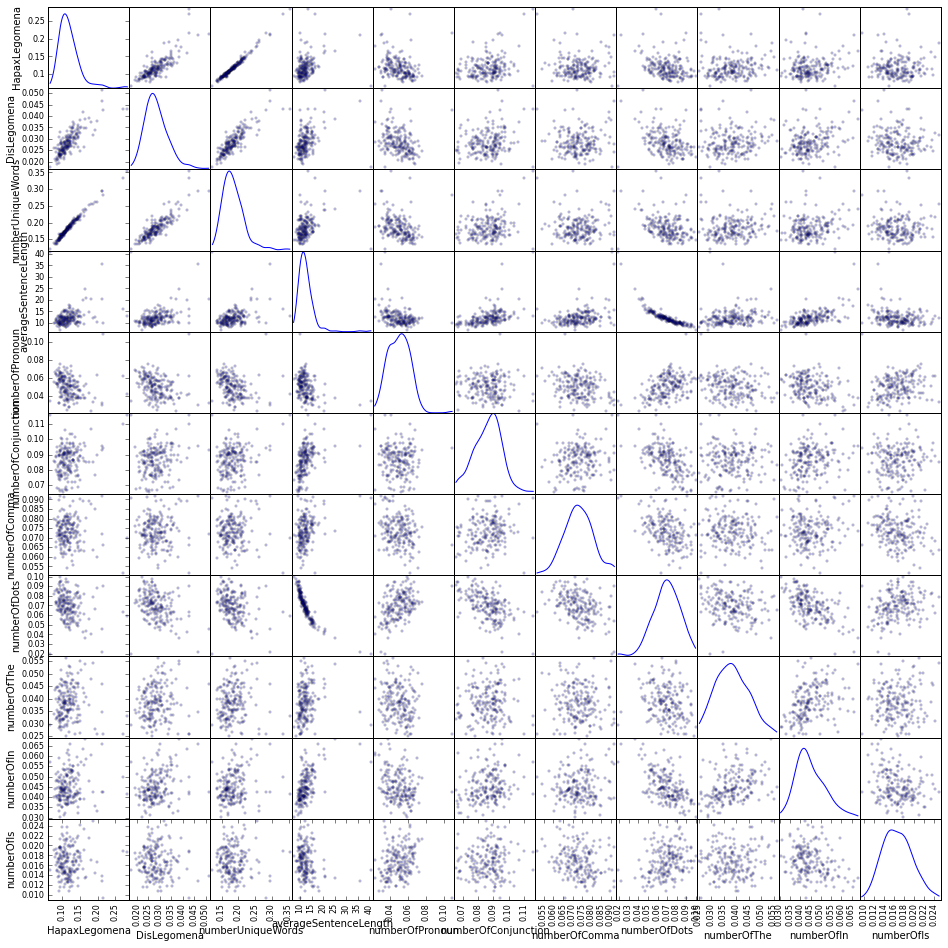

In [72]:
pd.scatter_matrix(df, alpha=0.2, figsize=(16, 16), diagonal='kde')
plt.show()

## Step 2 Construct n-grams using sklearn

In [73]:
title = []
text = []

for act in df.index:
    content = works[act]
    title.append(act)
    text.append(content['text'])


In [74]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from __future__ import print_function

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans, AffinityPropagation, AgglomerativeClustering, MeanShift, SpectralClustering, DBSCAN, Birch 
import numpy as np

In [75]:
# excluding stop words, n-grams is an input
def getTfidf(ngram_range):
    count_vect = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X_counts = count_vect.fit_transform(text)

    tfidf_transformer = TfidfTransformer(use_idf=True)
    X_tfidf = tfidf_transformer.fit_transform(X_counts)
    return X_tfidf

In [76]:
def getSVD(X_tfidf, n_components):
    
    svd = TruncatedSVD(n_components = n_components, random_state = randomState)
    lsa = make_pipeline(svd, Normalizer(copy=False))
    X = lsa.fit_transform(X_tfidf)

    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))
    
    return X

    

In [77]:
# Features from n-grams, use fewer components
X_tfidf = getTfidf(ngram_range = (3,5))
X = getSVD(X_tfidf, n_components = 6)
df_ngrams = pd.DataFrame(data=X, index = title, 
                         columns=['n-gram 1st component', 'n-gram 2nd compoent', 'n-gram 3rd', 'n-gram 4th', 'n-gram 5th', 'n-gram 6th',])
df_ngrams.head()

Explained variance of the SVD step: 3%


,n-gram 1st component,n-gram 2nd compoent,n-gram 3rd,n-gram 4th,n-gram 5th,n-gram 6th
KING JOHN ACT I.,0.302028,-0.251993,-0.319745,0.369608,-0.371739,0.684282
THE WINTER'S TALE ACT IV.,-0.266214,-0.011225,0.478821,-0.803657,0.129791,0.192416
THE THIRD PART OF KING HENRY THE SIXTH ACT II.,-0.056415,-0.200264,-0.933772,0.084584,-0.251141,-0.120647
THE TRAGEDY OF ANTONY AND CLEOPATRA ACT V.,0.004065,-0.178863,-0.466154,-0.674855,0.348727,-0.416715
KING RICHARD THE SECOND ACT IV.,0.243563,0.042064,-0.349632,0.677983,0.580065,-0.143277


## Step 3 Combine n-grams and other features

In [78]:
# Merge all features
df_all = df.join(df_ngrams)
df_all.head()

,HapaxLegomena,DisLegomena,numberUniqueWords,averageSentenceLength,numberOfPronoun,numberOfConjunction,numberOfComma,numberOfDots,numberOfThe,numberOfIn,numberOfIs,n-gram 1st component,n-gram 2nd compoent,n-gram 3rd,n-gram 4th,n-gram 5th,n-gram 6th
act,,,,,,,,,,,,,,,,,
KING JOHN ACT I.,0.141216,0.032095,0.209797,14.509804,0.032095,0.091554,0.075338,0.049324,0.030743,0.042905,0.018919,0.302028,-0.251993,-0.319745,0.369608,-0.371739,0.684282
THE WINTER'S TALE ACT IV.,0.090247,0.022014,0.145939,13.075688,0.056832,0.089458,0.071742,0.064112,0.039730,0.044992,0.016927,-0.266214,-0.011225,0.478821,-0.803657,0.129791,0.192416
THE THIRD PART OF KING HENRY THE SIXTH ACT II.,0.108574,0.025240,0.173878,15.344262,0.029647,0.095353,0.076389,0.050748,0.038194,0.043803,0.014690,-0.056415,-0.200264,-0.933772,0.084584,-0.251141,-0.120647
THE TRAGEDY OF ANTONY AND CLEOPATRA ACT V.,0.121907,0.029130,0.186552,10.663830,0.050878,0.079010,0.067438,0.079010,0.035914,0.046688,0.015563,0.004065,-0.178863,-0.466154,-0.674855,0.348727,-0.416715
KING RICHARD THE SECOND ACT IV.,0.130559,0.037343,0.208381,14.260163,0.042189,0.086659,0.074971,0.055587,0.038198,0.055302,0.016819,0.243563,0.042064,-0.349632,0.677983,0.580065,-0.143277


## Step 4 Clustering

In [79]:
def getLabels(X, n_clusters = 8, method = 'KMeans'):
    
    if method == 'KMeans':
        cluster = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=500, 
                         n_init=5, random_state = randomState)   
    elif method == 'AffinityPropagation':
        cluster = AffinityPropagation(max_iter=1000)
    elif method == 'AgglomerativeClustering':
        cluster = AgglomerativeClustering(n_clusters=n_clusters)
    elif method == 'Birch':
        cluster = Birch()
    elif method == 'DBSCAN':
        cluster = DBSCAN(random_state = randomState, eps=0.1, min_samples=3)
    elif method == 'SpectralClustering':
        cluster = SpectralClustering(n_clusters=n_clusters)
    elif method == 'MeanShift':
        cluster = MeanShift()
        

    return cluster.fit_predict(X)
        

def printClusters(labels):
    for i in set(labels):
        index = np.squeeze(np.argwhere(labels == i)).tolist()
        print(index)
    
        print(np.array(title)[index])
        print('\n')
        
def print2D(X, x_label, y_label, title, labels, n_labels):
    plt.figure(figsize = (9,7))
    plt.scatter(X[:,0], X[:,1], c=labels, marker='+', s=100, linewidths=2)
    plt.ylabel(y_label, fontsize=14, fontweight='bold')
    plt.xlabel(x_label, fontsize=14, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold')
    
    ax = plt.gca()
    for i in range(len(labels)):
        if labels.tolist().count(labels[i]) <= n_labels:
            ax.annotate(df_all.index[i], xy=X[i,:], fontweight='bold')
    
    xmin = min(X[:,0])
    xmax = max(X[:,0])
    ymin = min(X[:,1])
    ymax = max(X[:,1])
    
    xrange = xmax - xmin
    yrange = ymax - ymin
    
    xmin = xmin - xrange/10
    xmax = xmax + xrange/10
    
    ymin = ymin - yrange/10
    ymax = ymax + yrange/10
    
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])
    plt.show()  

In [80]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import metrics
from sklearn.manifold import MDS

def clusterDocuments(X, scaled = False, PCA_X = False, n_clusters = 8, 
                     method = 'KMeans', visualize = 'PCA', verbose = True, n_labels=3):
        
    
    if scaled:
        X = preprocessing.scale(X)
        
    if PCA_X:
        X = PCA().fit_transform(X)
        
    if PCA_X:
        X_2D_PCA = X[:, 0:2]
    else: 
        X_2D_PCA = PCA(n_components=2).fit_transform(X)
        X_2D_MDS = MDS(n_components=2).fit_transform(X)
        
    labels = getLabels(X, n_clusters, method)
        
    if visualize == 'PCA':
        print2D(X_2D_PCA, 'PCA 1st component', 'PCA 2nd component', method, labels, n_labels)
    elif visualize == 'MDS':
        print2D(X_2D_MDS, 'MDS 1st component', 'MDS 2nd component', method, labels, n_labels)
        
    
    print('Number of clusters: ', len(set(labels)))
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, random_state=randomState))
    
    if verbose:
        printClusters(labels)

def visualizeCovariance(X, scaled = False):
    if scaled:
        X = preprocessing.scale(X)
        title = 'Standardized'
    else:
        title = 'Non-Standardized'
    
    pca = PCA(n_components=None)
    pca.fit(X)
    
    covariance = pca.get_covariance()
    
    
    width = 0.5
    ind = np.arange(len(pca.explained_variance_ratio_))

    plt.figure()
    ax = plt.gca()
    ax.bar(ind, pca.explained_variance_ratio_, width, color='gray')
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Components')
    plt.title(title, fontweight='bold')
    plt.show()
    
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(covariance, cmap=plt.cm.Blues, alpha=0.8)
    # Format
    fig = plt.gcf()
    fig.set_size_inches(8, 8)
    # turn off the frame
    ax.set_frame_on(False)
    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(covariance.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(covariance.shape[1]) + 0.5, minor=False)
    # want a more natural, table-like display
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    # Set the labels
    # label source:https://en.wikipedia.org/wiki/Basketball_statistics
    labels = df_all.columns
    # note I could have used nba_sort.columns but made "labels" instead
    ax.set_xticklabels(labels, minor=False)
    ax.set_yticklabels(labels, minor=False)
    # rotate the
    plt.xticks(rotation=90)
    ax.grid(False)
    # Turn off all the ticks
    ax = plt.gca()
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    plt.title(title, fontweight='bold', y=0)
    plt.show()
    

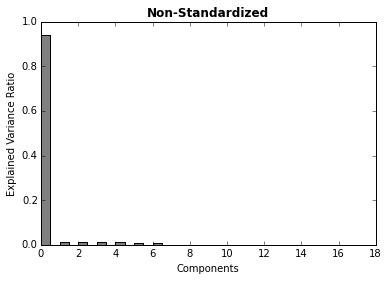

/Users/byan/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


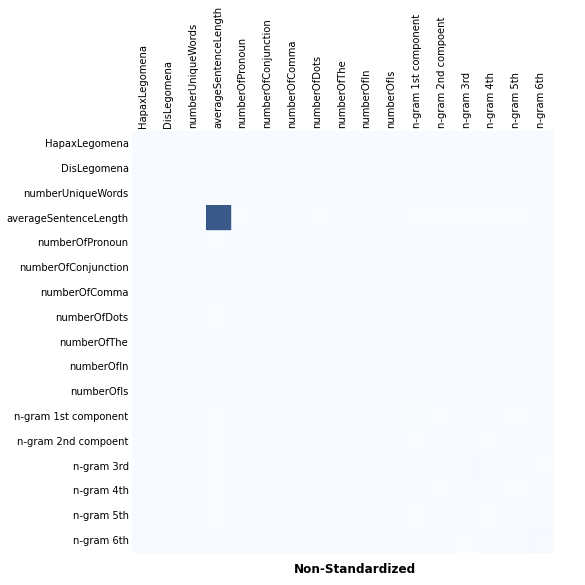

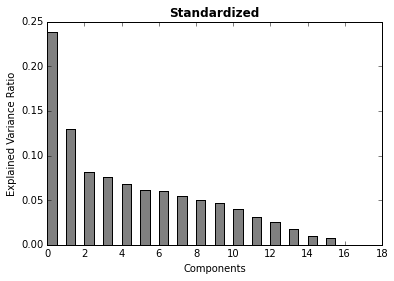

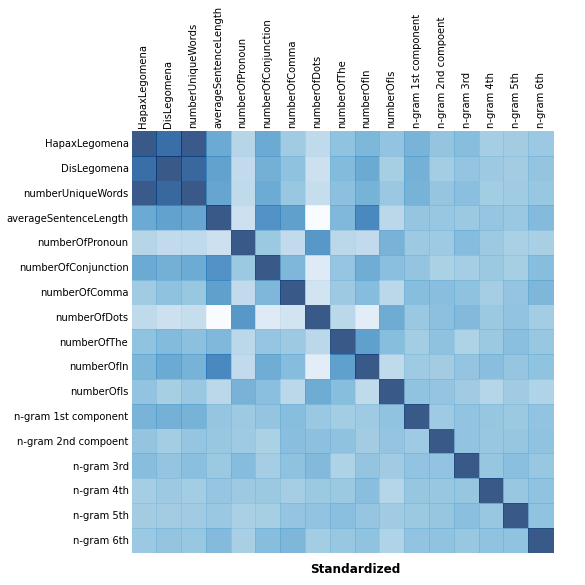

In [81]:
X = df_all.values
visualizeCovariance(X, scaled = False)
visualizeCovariance(X, scaled = True)

### K-Means

> By adding the features of average sentence length, number of unique words normalized by total number of words, fequency of conjunctions, and etc., acts are clustered according to the writing style (need to be verified by visualization).

### Affinity Propagation

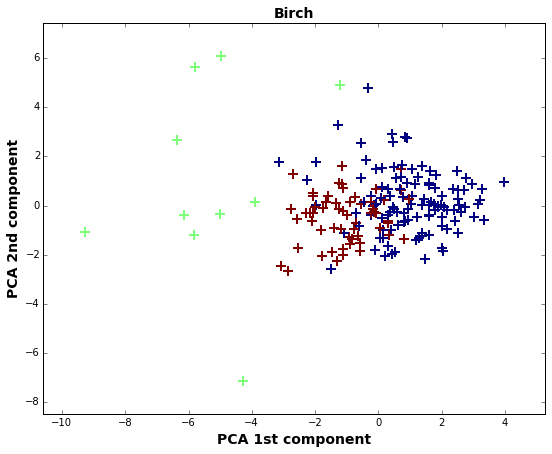

Number of clusters:  3
Silhouette Coefficient: 0.081
[0, 1, 5, 8, 9, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 24, 25, 26, 29, 31, 32, 34, 36, 37, 38, 39, 40, 41, 44, 45, 48, 49, 50, 51, 52, 53, 55, 56, 58, 59, 61, 62, 65, 66, 67, 68, 69, 71, 74, 76, 79, 82, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 98, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 113, 115, 117, 118, 120, 121, 123, 124, 125, 126, 127, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 145, 146, 147, 149, 152, 153, 156, 159, 161, 163, 169, 170, 171, 172, 173, 174, 179, 180, 181]
['KING JOHN ACT I. ' "THE WINTER'S TALE ACT IV."
 'THE TWO GENTLEMEN OF VERONA ACT V. ' 'MEASURE FOR MEASURE ACT II.'
 'THE TRAGEDY OF CORIOLANUS ACT III' 'THE TRAGEDY OF CORIOLANUS ACT I. '
 'THE TRAGEDY OF CORIOLANUS ACT II.' 'MEASURE FOR MEASURE ACT III'
 'THE TRAGEDY OF ANTONY AND CLEOPATRA ACT IV.'
 'THE MERCHANT OF VENICE ACT II.' 'THE TRAGEDY OF MACBETH ACT III'
 'ALLS WELL THAT ENDS WELL ACT IV ' 'THE TWO GENTLEMEN OF VERONA ACT II.

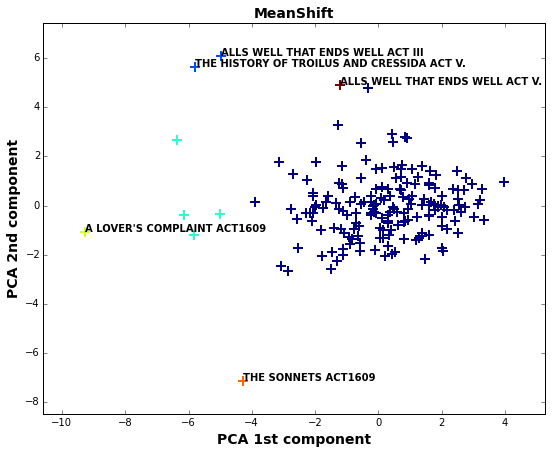

Number of clusters:  6
Silhouette Coefficient: 0.306


/Users/byan/anaconda/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [82]:
#clusterDocuments(X, n_clusters = 8, scaled = True, PCA_X = True, method = 'SpectralClustering', verbose = False)
clusterDocuments(X, scaled = True, PCA_X = True, method = 'Birch')
#clusterDocuments(X, scaled = True, PCA_X = True, method = 'DBSCAN')
clusterDocuments(X, scaled = True, PCA_X = True, method = 'MeanShift', verbose = False)
